# Gradient Descent

Gradient descent is a general-purpose optimization algorithm that lies at the heart of many machine learning applications. The idea is to iteratively adjust a set of parameters, $\theta$, to minimize a given cost function.

Like a ball rolling downhill, gradient descent uses the local gradient of the cost function with respect to $\theta$ to guide its steps in the direction of steepest descent.

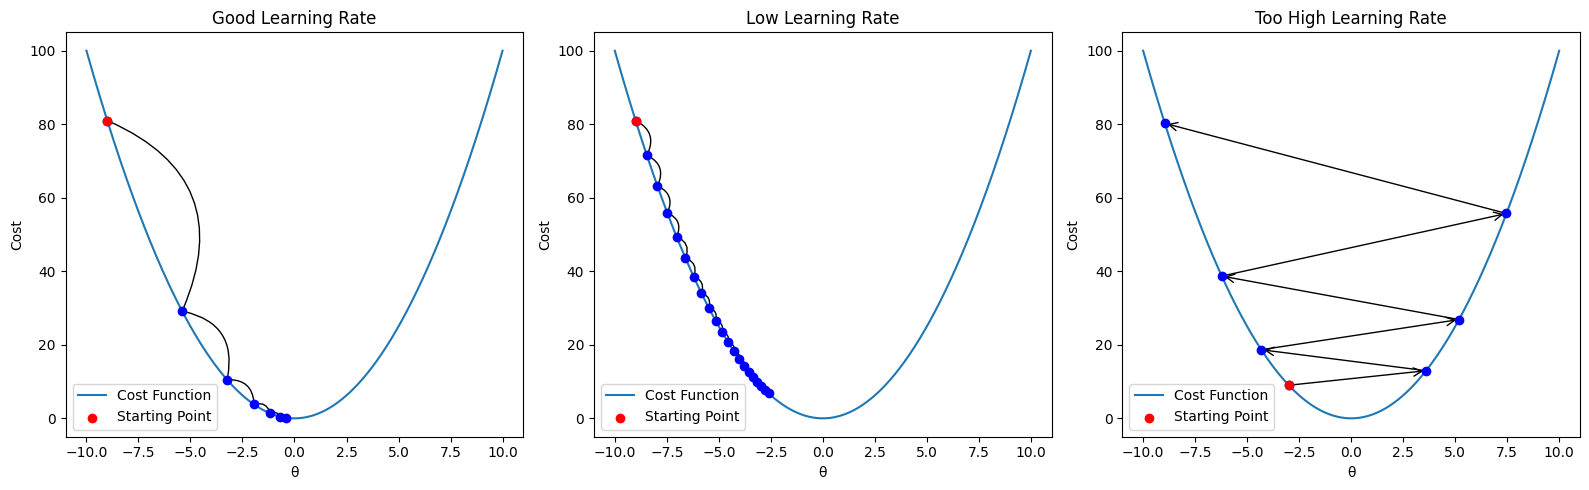

In [649]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# --- Function and gradient definition ---
def f(x):
    """Cost function"""
    return x**2

def grad_f(x):
    """Gradient of the cost function"""
    return 2 * x

# --- Plotting ---
def plot_gradient_descent(
    ax,
    title,
    x_start=-9,
    learning_rate=0.2,
    num_steps=6,
    curve_radius=-0.5,
    xlim=(-10, 10),
    arrowstyle="-"
):
    """
    Plot gradient descent steps on a quadratic cost function.
    
    Parameters:
        ax (matplotlib axis): Axis to plot on.
        title (str): Title for the subplot.
        x_start (float): Initial x position.
        learning_rate (float): Learning rate for gradient descent.
        num_steps (int): Number of descent steps to visualize.
        curve_radius (float): Curvature of arrows.
        xlim (tuple): Range of x-axis.
        arrowstyle (str): Arrow style (e.g., '->', '-').
    """
    # Compute descent steps
    x_vals = [x_start]
    for _ in range(num_steps):
        x_new = x_vals[-1] - learning_rate * grad_f(x_vals[-1])
        x_vals.append(x_new)

    # Plot cost function
    x_range = np.linspace(*xlim, 1000)
    ax.plot(x_range, f(x_range), label='Cost Function', zorder=1)
    ax.set_xlabel('θ')
    ax.set_ylabel('Cost')
    ax.set_title(title)

    # Plot arrows for descent steps
    for i in range(len(x_vals) - 1):
        start_pt = (x_vals[i], f(x_vals[i]))
        end_pt = (x_vals[i + 1], f(x_vals[i + 1]))
        arrow = FancyArrowPatch(
            start_pt,
            end_pt,
            connectionstyle=f"arc3,rad={curve_radius}",
            arrowstyle=arrowstyle,
            mutation_scale=15,
            color='black'
        )
        ax.add_patch(arrow)

    # Plot points
    ax.scatter(x_vals, [f(x) for x in x_vals], color='blue')
    ax.scatter(x_start, f(x_start), color='red', label='Starting Point')
    ax.legend()

# --- Main execution ---
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

plot_gradient_descent(axes[0], "Good Learning Rate")
plot_gradient_descent(axes[1], "Low Learning Rate", learning_rate=0.03, num_steps=20)
plot_gradient_descent(axes[2], "Too High Learning Rate", learning_rate=1.1, x_start=-3, curve_radius=0, arrowstyle="->")

plt.tight_layout()
plt.show()


## The Role of the Learning Rate

The most critical hyperparameter in gradient descent is the **learning rate**. Choosing the right learning rate is crucial to ensure the algorithm converges efficiently.

* If the learning rate is too **small**, the algorithm will take a long time to converge.
* If it’s too **large**, the steps might overshoot the minimum, causing the algorithm to diverge or oscillate wildly.

The figure above shows how different learning rates affect convergence.

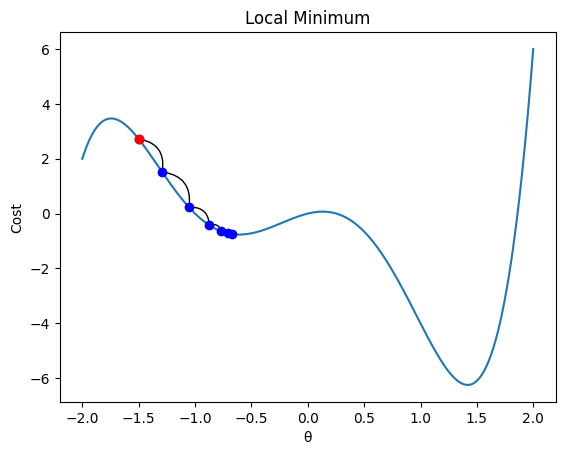

In [636]:
def f(x):
    return x**5 + x**4 - 4 * x**3 - 3 * x**2 + x

def grad_f(x):
    return 5 * x**4 + 4 * x**3 - 12 * x**2 - 6 * x + 1

fig, ax = plt.subplots()
plot_gradient_decent(ax, "Local Minimum", start=-2, end=2, x_start=-1.5, learning_rate=0.04, num_steps=6)

Another potential pitfall is that gradient descent can get **stuck in local minima**. For non-convex functions, this can result in suboptimal solutions.

---

## Gradient Descent for Linear Regression

Let's revisit yesterday’s linear regression example. Although linear regression has a closed-form solution, it serves as a great illustration of how gradient descent operates.

We define a cost function \$J(w, b)\$, then derive its gradient with respect to both parameters:

$$
J(w,b) := \frac{1}{2m} \sum_{i=1}^{m} (w \cdot x_i + b - y_i)^2
$$

$$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (w \cdot x_i + b - y_i) \cdot x_i
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (w \cdot x_i + b - y_i)
$$

In [488]:
import numpy as np
import matplotlib.pyplot as plt

def J(x, y, w, b):
    y_hat = w * x + b
    return (1/(2*m)) * np.sum((y_hat - y)**2)


def J_grad(x, y, w,b):
    error = w * x + b - y
    dw = np.average(error * x)
    db = np.average(error)
    return dw, db
    

    

# Generate data
np.random.seed(0)
x = np.linspace(0, 10, 500)
y = w * x + b
y += np.random.randn(*x.shape) * 3 # Add noise

## Variants of Gradient Descent

We'll compare three different versions of gradient descent:

1. **Batch Gradient Descent** – Uses the entire dataset to compute the gradient at each step.
2. **Stochastic Gradient Descent (SGD)** – Updates parameters using one sample at a time. Faster updates but more noise.
3. **Mini-Batch Gradient Descent** – A compromise between the two: updates using small batches of samples.

While SGD allows for faster updates per epoch, it introduces high variance. Mini-batch gradient descent reduces this noise while still benefiting from faster convergence than batch GD.

In [449]:
def gradient_decent(x, y, init_w, init_b, alpha, num_epochs):
    w = init_w
    b = init_b
    path = [(w,b)]
    for _ in range(num_epochs):
        dw, db = J_grad(x,y,w,b)
        w -= alpha * dw
        b -= alpha * db
        path.append((w,b))
    return path

def stochastic_gradient_decent(x, y, init_w, init_b, alpha, num_epochs):
    w = init_w
    b = init_b
    path = [(w,b)]
    m = len(x)
    for _ in range(num_epochs):
        indices = np.random.permutation(m)
        new_x = x[indices]
        new_y = y[indices]
        for i in range(m):
            cx = new_x[i]
            cy = new_y[i]
            dw, db = J_grad(cx,cy,w,b)
            w -= alpha * dw
            b -= alpha * db
            path.append((w,b))
    return path

def minibatch_gradient_decent(x, y, init_w, init_b, alpha, num_epochs, batch_size):
    w = init_w
    b = init_b
    path = [(w,b)]
    m = x.shape[0]
    for _ in range(num_epochs):
        indices = np.random.permutation(m)
        new_x = x[indices]
        new_y = y[indices]
        for i in range(0, m, batch_size):
            cx = new_x[i:i+batch_size]
            cy = new_y[i:i+batch_size]
            dw, db = J_grad(cx,cy,w,b)
            w -= alpha * dw
            b -= alpha * db
            path.append((w,b))
    return path

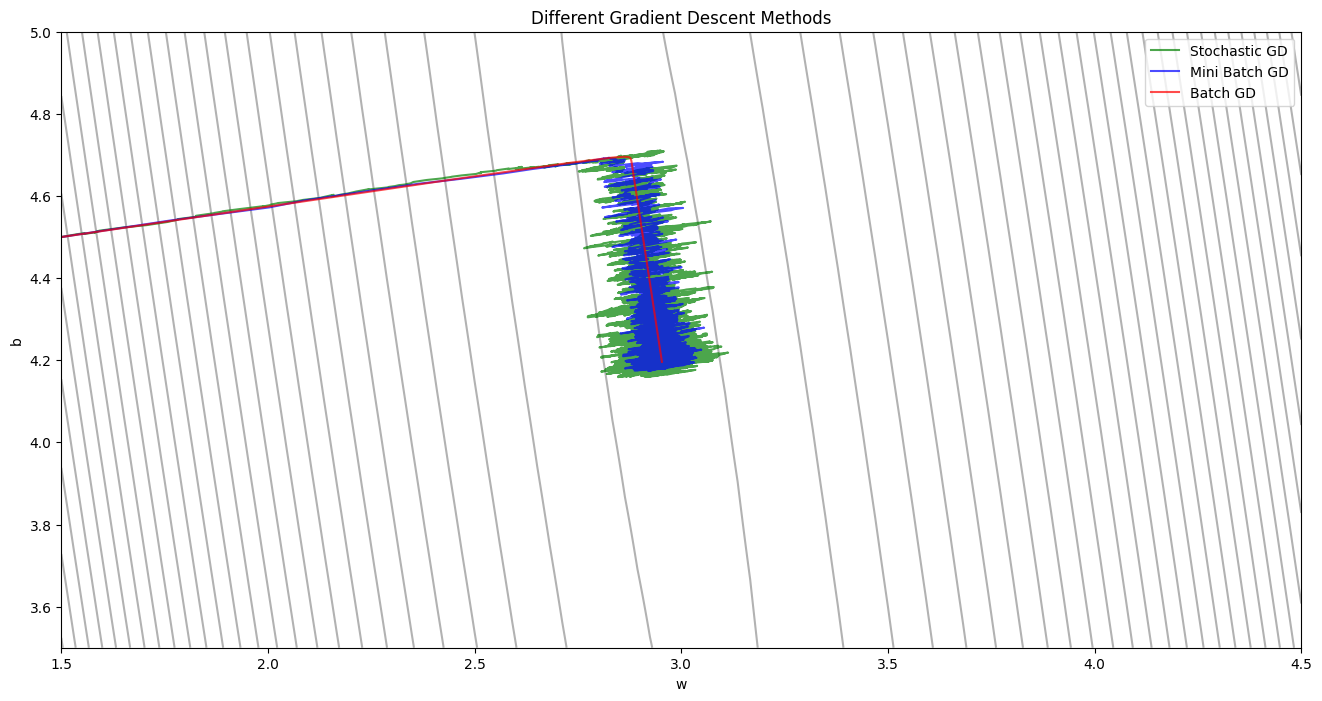

In [653]:
def plot_cost_function(x, y, origin_x, origin_y, width, height, levels=30):
    W, B = np.meshgrid(np.linspace(origin_x, width, 100), np.linspace(origin_y, height, 100))
    cost = np.array([[ J(x, y, w, b) for w in W[0]] for b in B[:,0]])
    cp = plt.contour(W, B, cost, levels=levels, colors="black", alpha=0.3)

def plot_path(path, color="red", **kwargs):
    ws, bs = zip(*path)
    plt.plot(ws, bs, color=color, alpha=0.7, **kwargs)

plt.figure(figsize=(16, 8))

w_init = 1.5
b_init = 4.5

origin = (1.5,3.5) 
size = 1.5

gd_path = gradient_decent(x, y, w_init, b_init, alpha=0.02, num_epochs=1000)
bmgd_path = minibatch_gradient_decent(x, y, w_init, b_init, alpha=0.005, num_epochs=200, batch_size=20)
sgd_path = stochastic_gradient_decent(x, y, w_init, b_init, alpha=0.0005, num_epochs=100)

plot_cost_function(x, y, origin[0], origin[1], origin[0]+2*size, origin[1]+size)
plot_path(sgd_path, color="green", label="Stochastic GD")
plot_path(bmgd_path, color="blue", label="Mini Batch GD")
plot_path(gd_path, label="Batch GD")
plt.title("Different Gradient Descent Methods")
plt.xlabel("w")
plt.ylabel("b")
plt.legend()
plt.show()

Notice that the path curves as it approaches the minimum. This happens because the scales of \$w\$ and \$b\$ are different, causing the cost surface to be skewed.

---

## Feature Scaling and Faster Convergence

We can fix the skewed path by **rescaling** the input features. After standardizing the input \$x\$, the cost surface becomes more isotropic (circular contours), allowing for more direct paths to the minimum and faster convergence.

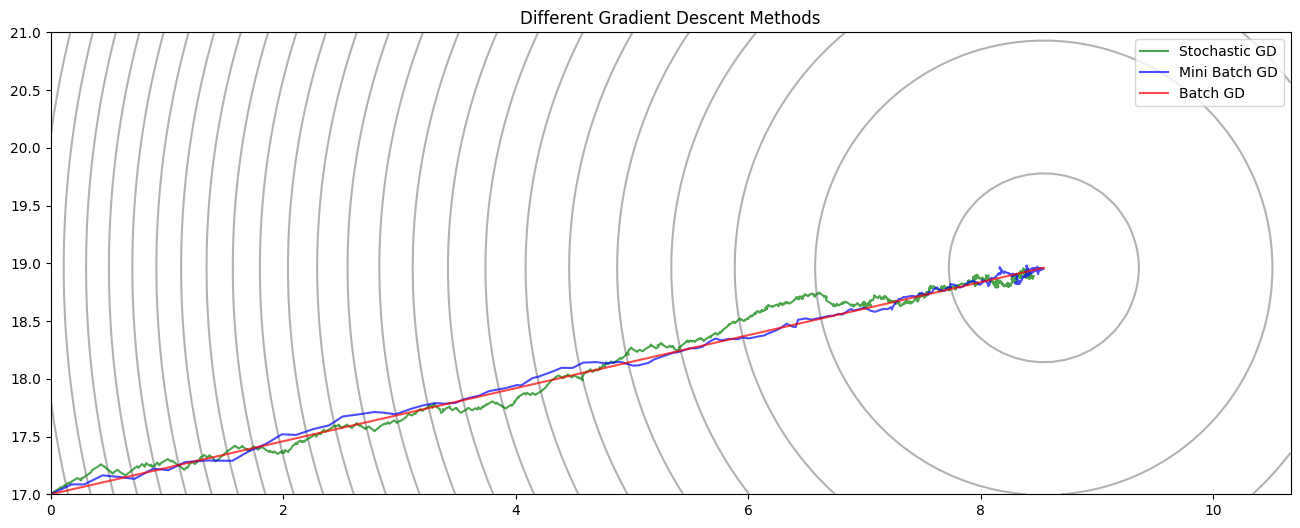

In [654]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_x = scaler.fit_transform(x.reshape(-1,1), y).squeeze()

w_init = 0
b_init = 17

scale = 4
figsize=(16,6)
ratio = figsize[0] / figsize[1]

plt.figure(figsize=figsize)

gd_path = gradient_decent(scaled_x, y, w_init, b_init, alpha=0.025, num_epochs=1000)
bmgd_path = minibatch_gradient_decent(scaled_x, y, w_init, b_init, alpha=0.02, num_epochs=10, batch_size=20)
sgd_path = stochastic_gradient_decent(scaled_x, y, w_init, b_init, alpha=0.002, num_epochs=4)

plot_cost_function(scaled_x, y, w_init, b_init, w_init+ratio*scale, b_init+scale)
plot_path(sgd_path, color="green", label="Stochastic GD")
plot_path(bmgd_path, color="blue", label="Mini Batch GD")
plot_path(gd_path, label="Batch GD")
plt.title("Different Gradient Descent Methods")
plt.legend()
plt.xlim((w_init, w_init+ratio*scale))
plt.ylim((b_init, b_init+scale))
plt.show()

## Summary

Gradient descent is a powerful and versatile optimization tool. Understanding how the learning rate, local minima, and feature scaling affect convergence is essential for training machine learning models efficiently. The various flavors of gradient descent offer trade-offs between speed and stability, and choosing the right one depends on the problem and dataset size.